In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

C:\Users\mja04\AppData\Local\Temp\ipykernel_14452\3316874627.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Load the CSV file into a DataFrame
LCD = pd.read_csv('C:/Users/mja04/OneDrive/Data Science Capstone - MH/LCE.csv')

# Check for missing values in each column
missing_values = LCD.isnull().sum()
print(missing_values)

# Convert 'Male' to 1 and 'Female' to 0
LCD['GENDER'] = LCD['GENDER'].replace({'Male': 1, 'Female': 0})
print(LCD.head)

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64
<bound method NDFrame.head of       GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0          1   65        1               1        1              0   
1          0   55        1               0        0              1   
2          0   78        0               0        1              1   
3          1   60        0               1        1              1   
4          0   80        1               1        0              1   
...      ...  ...      ...             ...      ...            ...   
2995       0   71        0         

In [15]:
from sklearn.preprocessing import StandardScaler

# Assume `data` is your dataframe
data_scaled = LCD.drop(columns=['AGE'])  # Exclude Age
age = LCD[['AGE']]  # Select Age for scaling
# Standardize Age
scaler = StandardScaler()
age_scaled = scaler.fit_transform(age)

# Combine scaled Age with binary variables
processed_data = data_scaled.copy()
processed_data['AGE'] = age_scaled
print(processed_data.columns)


Index(['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER', 'AGE'],
      dtype='object')


In [5]:
pca = PCA()

# Fit PCA on the scaled data
pca.fit(processed_data)

PCA()

In [6]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")



Explained variance ratio: [0.21099523 0.05881919 0.05729045 0.05694201 0.05604342 0.05546328
 0.05463749 0.05375682 0.05307693 0.05173924 0.05117408 0.04952737
 0.04939259 0.04816795 0.04684531 0.04612864]


In [8]:
X_pca = pca.transform(processed_data)

In [10]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(processed_data)

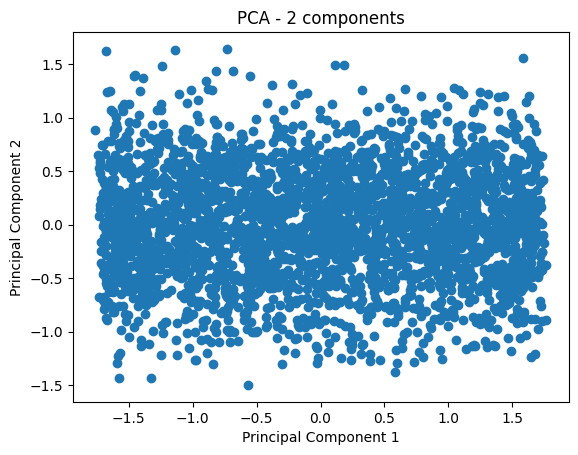

In [11]:
import matplotlib.pyplot as plt

# Plot the first two principal components
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - 2 components")
plt.show()

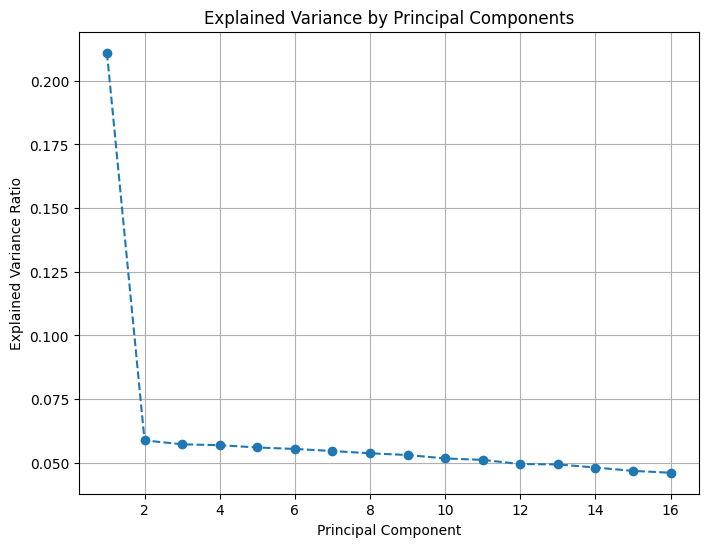

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

PCA is sensitive to scaling and AGE wasnt normalized properly there may be new findings here. 